# Turbofan Health Monitoring and Predictive Maintenance

# 1 Introduction

## 1.1 Scope of the project

The aim of this project is to develop and discuss methodologies and algorithms to monitor the health status and carry out predictive maintenance on commercial aircraft engines based only on the information gathered by the sensors installed throughout the engine. For such purpose, a large amount of data from a turbofan simulation, with different flight and degradation conditions on different components of the engine, have been analyzed. If the simulation is accurate enough, it is possible to build mathematical models that could allow airlines and aircraft operators identify and isolate degradation in the engines of their fleets by analyzing in-service data. By doing this, it is possible to avoid unnecessary stops for MRO (Maintenance, Repair and Overhaul), prevent higher fuel consumption due to degradation of some components or even major incidents.

Two different approach will be discussed and compared: Multiple polynomial regression and neural networks.

## 1.2 Parameters

Parameters analyzed in this project can be classified into measurements, health status parameters and auxiliary parameters:

- Measurements: these parameters represent physical magnitudes (temperature, pressure, altitude, rotational shaft speed, etc) that can be measured by onboard sensors. These measurements will comprise the independent set of parameters, or input parameters for our machine learning models. The list of measurements is shown below:

	
    - alt: altitude (ft)
    - Mach: Mach number
    - TRA: Throttle-resolver angle (%)
    - T2: Fan inlet total temperature
    - T24: Total temperature at low pressure compressor outlet (°R)
    - T30: Total temperature at high pressure compressor outlet (°R)
    - T48: Total temperature at high pressure turbine outlet (°R)
    - T50: Total temperature at low pressure turbine outlet (°R)
    - P15: Total pressure in by-pass duct (psia)
    - P2: Total pressure at fan inlet (psia)
    - P21: Total pressure at fan outlet (psia)
    - P24: Total pressure at low pressure compressor outlet (psia)
    - Ps30: Static pressure at high pressure compressor outlet (psia)
    - P40: Total pressure at burner outlet (psia)
    - P50: Total pressure at low pressure turbine outlet (psia)
    - Nf: Low pressure shaft rotational speed (rpm)
    - Nc: High pressure shaft rotational speed (rpm)
    - Wf: Fuel flow (pps)
    

- Health status parameters: these parameters make reference to the variation of the sub-system components health. They are represented in terms of percentage. Health degradation of the different components (compressors, turbines) affect their characteristic curves. The list of health parameters used in the project is shown below:


    - fan_eff_mod: Fan efficience (% variation)
    - fan_flow_mod: Fan airflow (% variation)
    - LPC_eff_mod: Low pressure compressor efficience (% variation)
    - LPC_flow_mod: Low pressure compressor airflow (% variation)
    - HPC_eff_mod: High pressure compressor efficience (% variation)
    - HPC_flow_mod: High pressure compressor airflow (% variation)
    - HPT_eff_mod: High pressure turbine efficience (% variation)
    - HPT_flow_mod: High pressure turbine airflow (% variation)
    - LPT_eff_mod: Low pressure turbine efficience (% variation)
    - LPT_flow_mod: Low pressure turbine airflow (% variation)
    
    
- Auxiliary parameters: parameters that are also included in the input datasets and are helpful for data visualization and train-test sets selection. They won't be part of the final train and test sets, i.e., they won't be part of the machine learning algorithms. These parameters are the following:


    - unit: parameter that identifies each turbofan unit in each input dataset
    - cycle: parameter that indicates the number of flight for each turbofan unit

    

## 1.3 Prognostics problem and solution approach

The idea behind this project is the following: given time-series measurements of the selected set of onboard sensors from a real fleet of turbofan engines, the proposed machine learning methods shall estimate as much accurate as possible the evolution of the health status parameters of the different turbofan components. Those sets correspond to the X_test and y_test that will be defined later on.

In order to feed our machine learning algorithms, a large set of training data with a known health status for each component is necessary. Nowadays it is possible to find some gas turbines simulations that can reproduce the behavior of turbofans with a high level of fidelity, under different flight and degradation conditions. The datasets used for this project were generated by C-MAPSS (Commercial Modular Aero- Propulsion System Simulation). This software is available in the [software section of the NASA website](https://software.nasa.gov/software/LEW-18315-2). Measurements and health status parameters generated by one of these simulations would create the X_train and y_train that will feed the machine learning algorithms.

Obviously, for this project we don't dispose of real engine data. Test sets were also generated by C-MAPSS. However, a clear separation in terms of turbofan units between train and test sets will be ensured.

## 1.4 Description of input datasets

Up to 9 different datasets, generated by C-MAPSS and available in the [data repository of the NASA website](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/), will be used and merged into a single working dataset. Each dataset contains different turbofan units, ranging from 9 to 15. Flight profiles and degradation evolution in each unit is independent from each other. Also important to mention that the different input datasets contains a different number of engine components that are subject of degradation:


     - 'N-CMAPSS_DS01-005.h5': Degradation of HTP_eff only
     - 'N-CMAPSS_DS02-006.h5': Degradation of HTP_eff, LPT_eff and LPT_airflow
     - 'N-CMAPSS_DS03-012.h5': Degradation of HTP_eff, LPT_eff and LPT_airflow
     - 'N-CMAPSS_DS04.h5': Degradation of Fan_eff and Fan_airflow
     - 'N-CMAPSS_DS05.h5': Degradation of HPC_eff and HPC_airflow
     - 'N-CMAPSS_DS06.h5': Degradation of LPC_eff, LPC_airflow, HPC_eff and HPC_airflow
     - 'N-CMAPSS_DS07.h5': Degradation of LPT_eff and LPT_airflow
     - 'N-CMAPSS_DS08a-009.h5: Degradation of all health status parameters
     - 'N-CMAPSS_DS08c-008.h5': Degradation of all health status parameters
     
## 1.5 Machine learning models

For the solution proposed to the problem explained beforehand, three machine models will be used, and a comparison in terms of accuracy will be established between them:

     - Multiple polynomial regression, degree 2
     - Multiple polynomial regression, degree 3
     - Neural networks
     
Multiple regression models are easy to implement and allow an accurate and precise understanding of the association of each individual factor with the outcome.

Equations and relations that describe the evolution of the airflow through a gas turbine are strongly non-linear, therefore a lineal regression model is ruled out as a suitable solution to the proposed problem. However, a multiple linear regression model of degree 4 or above, taking into account the large size of the dataset in this project, are not feasible unless a supercomputer is available.

For all these reasons, multiple polynomial regression of degree 2 and 3 were proposed as a suitable solution in terms of accuracy and computational costs.

On the other hand, neural networks have been gaining in popularity over the years and could be a good alternative solution due to their ability to work with insufficient information. The possibilities at creating a neural network model are endless. For this model, [rules of thumb](https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af) will be followed for our neural network settings.
    
More details about the implementation of these models are explained in more detail in the sections 5.1, 5.2 and 5.3, respectively.

## 1.6 Metrics of machine learning models

In order to assess the accuracy of each model, the coefficient of determination, also known as "R-squared" value, will be calculated between the real degradation values and the degradation values obtained by each model for the test set. R-squared value for the train set will also be calculated, but only as additional information.

Apart from the overall R-squared value for the overall set of degradation parameters of the test set, the coefficient of determination for each one will be calculated and compared between models. This will provide a good overview of which degradation in which turbofan components are more easily to be predicted, and in which cases it would be more difficult.

R-squared was the selected metrics or evaluation critera of the different machine learning models as it provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the models.


# 2 Data Preparation

## 2.1 Import necessary libraries

In [1]:
import os
import h5py
import time
import matplotlib
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


## 2.2 Read the datasets and merge them into the working dataset

From the NASA website, up to 9 datasets (.hdf files) will be used.

Datasets contain data from different turbofan engines. Each datasets contains a different number of engines between 9 and 15, and data gathered from each one correspond to a different number of flights (cycles), ranging from 50 to 100

In the original datasets, data are already divided into development (train) and test subsets; however we will establisha different criteria for the selection of the train and test set. From each dataset, data from about 20% of the engine units will be picked up as test subsets.

All datasets will be merged into a single dataset, thanks to the function add_dataset. As the number of engine unit are repeated in different datasets, they have to be relabelled so that all of them are uniquely identified throughout the dataset.

The output dataset is already divided into the input variables (df_X) and the output variables (df_y):

- df_X contains the measurements of the sensors inside the engine (temperatures, pressures, shaft speeds). It also contains flight condition which, in the end, are also measured by onboard sensors

- df_y contains the level of degradation in different turbofan components: fan, low pressure compressor, high pressure compressor, high pressure turbine, low pressure turbine

The columns "unit" (containing the unique engine identifier) and "alt" (altitude of flight) will be common to both df_X and df_y

In [2]:
def add_dataset(filename, df_X, df_y, N=100):

    '''
    INPUT:
    filename - .hdf file to be merged
    df_X - dataset that contains the sensor measurements
    df_y - dataset that contains the degradation levels
    N - Number of divisions: Only one in each N rows will be selected to the final dataset, otherwise the size
        of the dataset would be too large.
    
    OUTPUT:
    df_X - dataset that contains the sensor measurements, updated with new data from filename
    df_y - dataset that contains the degradation levels, updated with new data from filename

    '''

    # Load data
    with h5py.File(filename, 'r') as hdf:
            # Development set
            W_dev = np.array(hdf.get('W_dev'))             # W
            X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
            X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
            T_dev = np.array(hdf.get('T_dev'))             # T
            Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
            A_dev = np.array(hdf.get('A_dev'))             # Auxiliary
            
            # Test set
            W_test = np.array(hdf.get('W_test'))           # W
            X_s_test = np.array(hdf.get('X_s_test'))       # X_s
            X_v_test = np.array(hdf.get('X_v_test'))       # X_v
            T_test = np.array(hdf.get('T_test'))           # T
            Y_test = np.array(hdf.get('Y_test'))           # RUL  
            A_test = np.array(hdf.get('A_test'))           # Auxiliary
            
            # Varnams
            W_var = np.array(hdf.get('W_var'))
            X_s_var = np.array(hdf.get('X_s_var'))  
            X_v_var = np.array(hdf.get('X_v_var')) 
            T_var = np.array(hdf.get('T_var'))
            A_var = np.array(hdf.get('A_var'))
            
            # from np.array to list dtype U4/U5
            W_var = list(np.array(W_var, dtype='U20'))
            X_s_var = list(np.array(X_s_var, dtype='U20'))  
            X_v_var = list(np.array(X_v_var, dtype='U20')) 
            T_var = list(np.array(T_var, dtype='U20'))
            A_var = list(np.array(A_var, dtype='U20'))
            W_Xs_var = W_var + X_s_var
                          
    W = np.concatenate((W_dev, W_test), axis=0)  
    X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
    X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
    T = np.concatenate((T_dev, T_test), axis=0)
    Y = np.concatenate((Y_dev, Y_test), axis=0) 
    A = np.concatenate((A_dev, A_test), axis=0)
    W_Xs = np.concatenate((W, X_s), axis=1)

    
    df_A = DataFrame(data=A, columns=A_var)
    df_W_Xs = DataFrame(data=W_Xs, columns=W_Xs_var)
    df_T = DataFrame(data=T, columns=T_var)

    # Add the column "unit" to all dataframes
    df_T['unit'] = df_A['unit'].values
    df_T['alt'] = df_W_Xs['alt'].values
    df_W_Xs['unit'] = df_A['unit'].values
    
    df_T['cycle'] = df_A['cycle'].values
    df_W_Xs['cycle'] = df_A['cycle'].values


    X=[]
    y=[]
    
    for i in range(df_W_Xs.shape[0]//N):
        X.append(df_W_Xs.iloc[N*i,:])
        y.append(df_T.iloc[N*i,:])
        
    df_X1=pd.DataFrame(np.array(X),columns=df_W_Xs.columns)
    df_y1=pd.DataFrame(np.array(y),columns=df_T.columns)

    
    # Give each unit (each engine) a unique identifier
    unique_units_df_X = np.unique(df_X['unit'])
    len_unique_units_df_X = len(unique_units_df_X)
    unique_units_df_X1 = np.unique(df_X1['unit'])
    
    for i in range(len(unique_units_df_X1)):
        df_X1.unit.replace(unique_units_df_X1[i], i+1, inplace=True)
        df_y1.unit.replace(unique_units_df_X1[i], i+1, inplace=True)
        
    unique_units_df_X1 = np.unique(df_X1['unit'])
    
    for i in range(len(unique_units_df_X1)):
        df_X1.unit.replace(unique_units_df_X1[i], len(unique_units_df_X)+i+1, inplace=True)
        df_y1.unit.replace(unique_units_df_X1[i], len(unique_units_df_X)+i+1, inplace=True)
    
    # merge df_X1 and df_y1 to the existing df_X and df_y
    df_X = pd.concat([df_X, df_X1])
    df_y = pd.concat([df_y, df_y1])

    return df_X, df_y

In [3]:
# Initialize df_X and df_y

df_X_cols = ['alt', 'Mach', 'TRA', 'T2', 'T24', 'T30', 'T48', 'T50', 'P15', 'P2',
'P21', 'P24', 'Ps30', 'P40', 'P50', 'Nf', 'Nc', 'Wf', 'unit', 'cycle']

df_y_cols = ['fan_eff_mod', 'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod',
       'HPC_eff_mod', 'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod',
       'LPT_eff_mod', 'LPT_flow_mod', 'unit', 'alt', 'cycle']

X = []
y = []

df_X = pd.DataFrame(X,columns=df_X_cols)
df_y = pd.DataFrame(y,columns=df_y_cols)

In [4]:
# Read and add 'N-CMAPSS_DS01-005.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS01-005.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS02-006.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS02-006.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS03-012.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS03-012.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS04.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS04.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS05.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS05.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS06.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS06.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS07.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS07.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS08a-009.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS08a-009.h5', df_X, df_y)

# Read and add 'N-CMAPSS_DS08c-008.h5' dataset
df_X, df_y = add_dataset('N-CMAPSS_DS08c-008.h5', df_X, df_y)

# 3 Exploratory analysis

Note: This exploratory analysis is based on the analysis carried out by Manuel Arias. Please find more about Manuel's project in the section "17. Turbofan Engine Degradation Simulation Data Set-2" in the [data repository of the NASA website](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/).

## 3.1 General analysis

Basic statistical analysis of both df_X and df_y datasets are shown below:

In [5]:
df_X.describe()

,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,P21,P24,Ps30,P40,P50,Nf,Nc,Wf,unit,cycle
count,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000
mean,16473.823224,0.548183,61.548101,488.176388,568.062252,1330.277132,1639.178935,1125.829423,12.648342,9.849159,12.840949,15.620661,232.890604,237.010160,9.814372,1964.784897,8236.315171,2.497942,48.036534,38.202538
std,8108.421917,0.119274,18.125293,19.996691,20.944631,67.074836,120.963681,61.886806,2.871943,2.414899,2.915676,3.424985,57.938784,58.767458,2.739050,182.686730,222.333530,0.764820,27.931890,23.203231
min,3001.000000,0.189693,23.730299,422.094940,484.064780,1066.893605,1204.735483,880.754825,5.829014,4.398023,5.923556,6.820930,77.762204,79.496082,4.121492,1483.923247,7347.142672,0.639906,1.000000,1.000000
25%,10008.000000,0.454293,47.987938,471.651325,553.023418,1286.400085,1559.436952,1083.030928,10.176743,7.722433,10.331718,12.788871,189.486094,192.970487,7.416287,1852.176850,8091.865927,1.957086,25.000000,19.000000
50%,15870.000000,0.560133,66.884293,491.054676,565.422838,1325.989753,1648.085052,1115.252301,12.704971,9.901623,12.898554,15.569372,219.890185,224.005748,9.709774,2011.974710,8228.162891,2.290723,46.000000,37.000000
75%,23342.000000,0.646632,77.694756,505.119123,581.885335,1369.124644,1712.299257,1161.661807,14.936602,11.822273,15.164048,18.126803,266.391911,271.107835,11.906581,2115.218938,8367.820953,2.893267,71.000000,56.000000
max,35031.000000,0.748314,88.768898,525.173777,636.638536,1546.581434,1998.837640,1361.709479,20.446039,14.760423,20.757400,26.405679,454.365171,460.291345,16.735576,2290.644987,8911.847776,5.659118,99.000000,100.000000


In [6]:
df_y.describe()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,alt,cycle
count,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000,698998.000000
mean,-0.002137,-0.002120,-0.001029,-0.001256,-0.001214,-0.001755,-0.001529,-0.000582,-0.001528,-0.001780,48.036534,16473.823224,38.202538
std,0.009699,0.007202,0.003824,0.005177,0.002868,0.005202,0.002651,0.002079,0.003321,0.003672,27.931890,8108.421917,23.203231
min,-0.223446,-0.121209,-0.134348,-0.155209,-0.025540,-0.077919,-0.018806,-0.038908,-0.036194,-0.039019,1.000000,3001.000000,1.000000
25%,-0.000935,-0.001053,-0.000753,-0.000770,-0.001140,-0.001256,-0.001708,0.000000,-0.001486,-0.001723,25.000000,10008.000000,19.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000624,0.000000,-0.000187,-0.000229,46.000000,15870.000000,37.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,23342.000000,56.000000
max,0.000027,0.000052,0.000112,0.000128,0.000160,0.000063,0.000021,0.000110,0.000108,0.000145,99.000000,35031.000000,100.000000


For the subsequent data exploratory paragraphs, which are based on a large number of graphics, the function plot_variables is created below.

## 3.2 Analysis of NaN

It will be checked whether there are NaN in the working datasets

In [7]:
#Check number of NaN in the df_X dataset
df_X.isna().sum().sum()

0

In [8]:
#Check number of NaN in the df_X dataset
df_y.isna().sum().sum()

0

## 3.3 Analysis of distribution and outliers discussion

In order to get a better overview of the data and their distribution, all parameters of the input datasets will be represented in boxplots. It will also allow to identify points as potential outliers.

### 3.3.1 Analysis of sensor measurements distribution

Distribution of altitude, mach number, throttle-resolver angle and fuel flow are represented below.

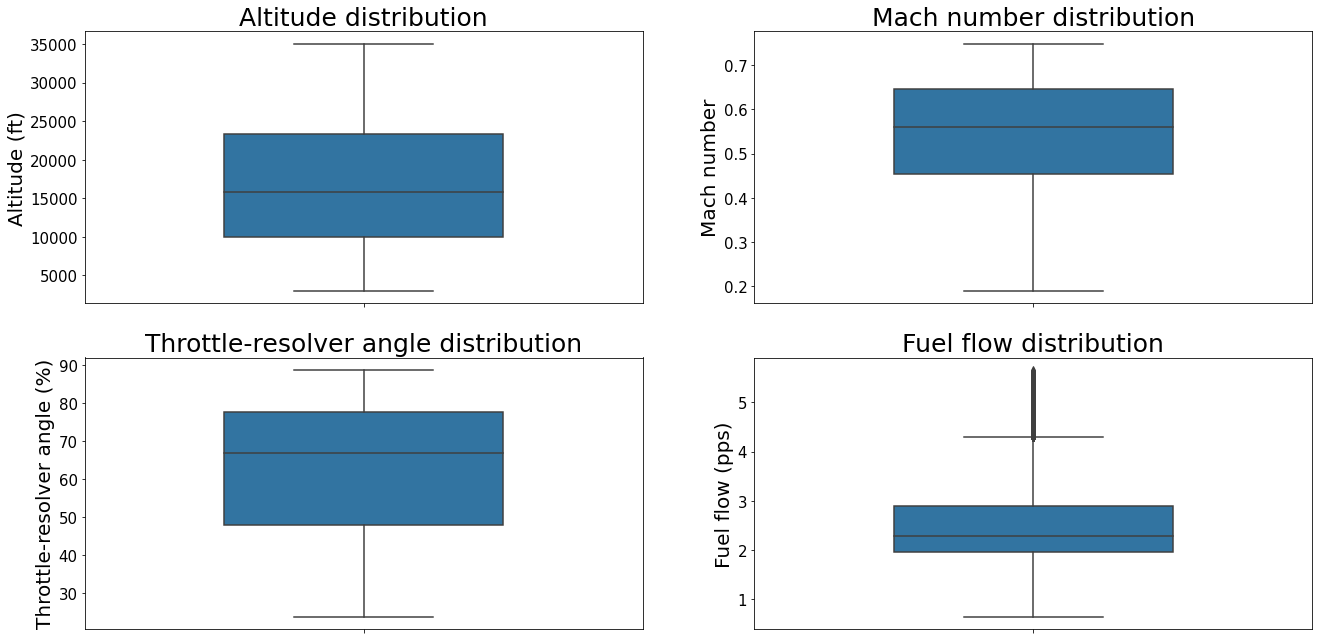

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40,22)) # create 2x2 array of subplots

# Altitude
sns.boxplot(y='alt', data=df_X, width=0.5, ax=axes[0,0])
axes[0,0].set_ylabel('Altitude (ft)', fontsize=20)
axes[0,0].set_title('Altitude distribution', fontsize=25)
axes[0,0].tick_params(labelsize=15)

# Mach number
sns.boxplot(y='Mach', data=df_X, width=0.5, ax=axes[0,1])
axes[0,1].set_ylabel('Mach number', fontsize=20)
axes[0,1].set_title('Mach number distribution', fontsize=25)
axes[0,1].tick_params(labelsize=15)

# TRA
sns.boxplot(y='TRA', data=df_X, width=0.5, ax=axes[1,0])
axes[1,0].set_ylabel("Throttle-resolver angle (%)", fontsize=20)
axes[1,0].set_title("Throttle-resolver angle distribution", fontsize=25)
axes[1,0].tick_params(labelsize=15)

# Fuel flow
sns.boxplot(y='Wf', data=df_X, width=0.5, ax=axes[1,1]).figure.set_size_inches(22, 11)
axes[1,1].set_ylabel("Fuel flow (pps)", fontsize=20)
axes[1,1].set_title("Fuel flow distribution", fontsize=25)
axes[1,1].tick_params(labelsize=15)
 

From the four parameters analyzed above, only fuel flow exceeds the limits defined by the 1.5 IQR rule. In this particular case, Q3 is exceeded by more than 1.5 IQR, as observed in the corresponding box plot. 

There are several points that exceeds Q3+1.5IQR, however the distribution seems smooth. One or a few flights that needed extra thrust (with the subsequent increase in fuel consumption) during short time intervals could explain this behavior. These points won't be considered as outliers and won't be dropped from the analysis.

Temperature measurements (T2, T24, T30, T48 and T50) are represented below.

Text(0, 0.5, 'Temperature (K)')

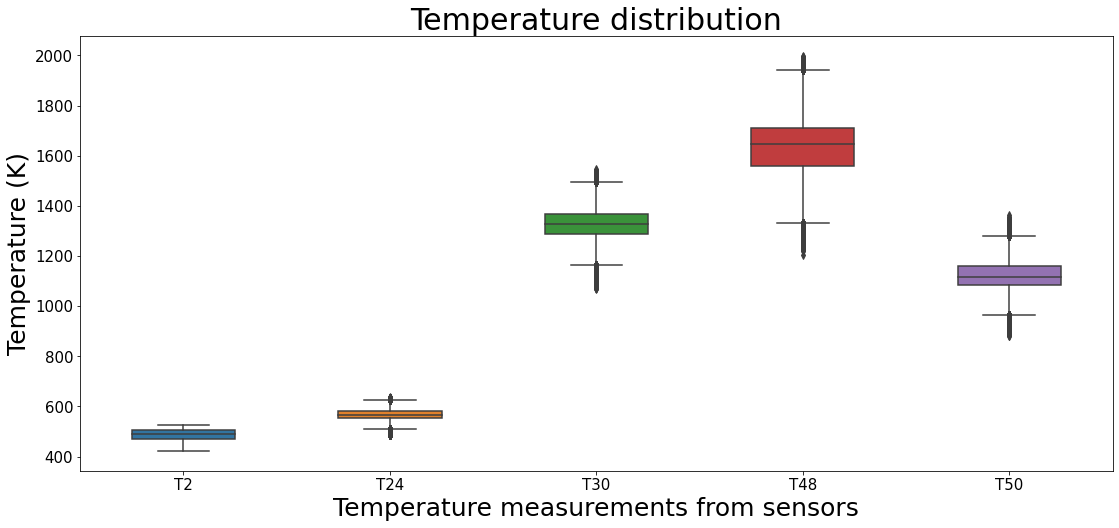

In [10]:
plt.title("Temperature distribution", fontsize=30)
plt.xlabel("Temperature", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

df_temp = df_X[['T2', 'T24', 'T30', 'T48', 'T50']].copy()

sns.boxplot(x="variable", y="value", data=pd.melt(df_temp), width=0.5).figure.set_size_inches(18.5, 8)

plt.xlabel("Temperature measurements from sensors", fontsize=25)
plt.ylabel("Temperature (K)", fontsize=25)

All temperature parameters except T2 exceed the upper and lower limit of the 1.5 IQR rule. However, distributions of these points are smooth and could be explained by particular situations in one or some flights. All values seem to be in concordance with the values obtained from a real turbofan engine, and there are no points that are far apart from the rest of the situation. These points won't be considered as outliers and won't be dropped from the analysis.

Pressure measurements (P15, P2, P21, P24, Ps30, P40 and P50) are represented below.

Text(0, 0.5, 'Pressure (psia)')

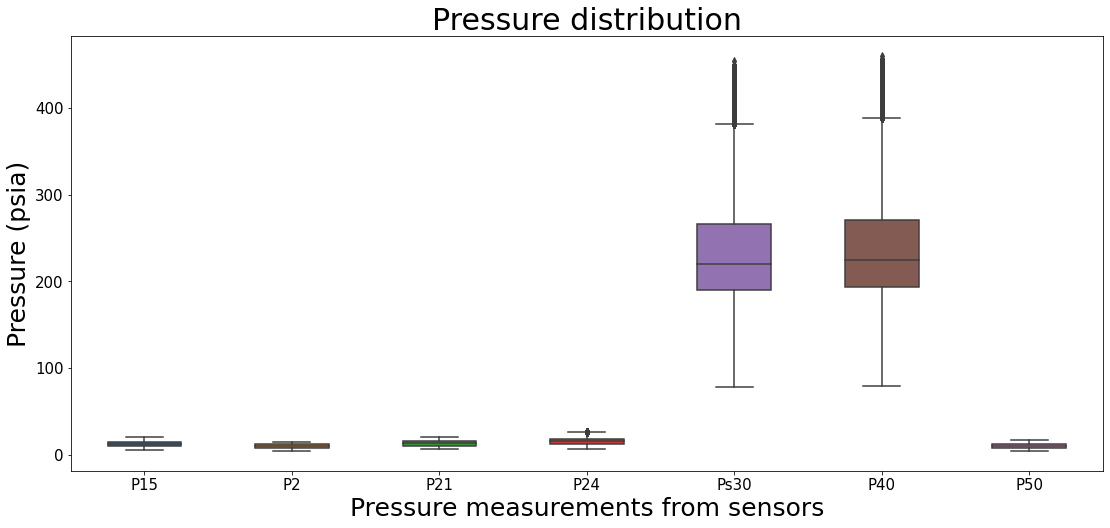

In [11]:
plt.title("Pressure distribution", fontsize=30)
plt.xlabel("Pressure", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

df_pressure = df_X[['P15', 'P2', 'P21', 'P24', 'Ps30', 'P40', 'P50']].copy()

sns.boxplot(x="variable", y="value", data=pd.melt(df_pressure), width=0.5).figure.set_size_inches(18.5, 8)

plt.xlabel("Pressure measurements from sensors", fontsize=25)
plt.ylabel("Pressure (psia)", fontsize=25)

More than half of the pressure measurements exceed the upper limit of the 1.5 IQR rule. However, evolution of these points is smooth, their values are in the range of what would be expected in a real aircraft engine and there is no point far away from the rest of the distribution. Therefore, they won't be treated as outliers and won't be dropped from the dataset.

Shaft rotational speed parameters (Nf and Nc) are represented below.

Text(0, 0.5, 'Shaft rotational speed (rpm)')

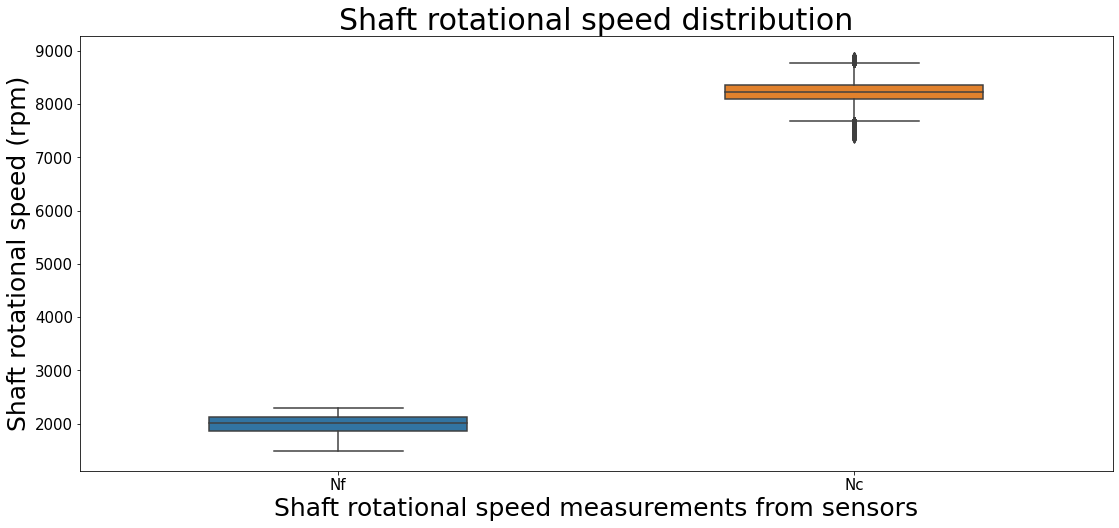

In [12]:
plt.title("Shaft rotational speed distribution", fontsize=30)
plt.xlabel("Shaft rotational speed", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

df_rot = df_X[['Nf', 'Nc']].copy()

sns.boxplot(x="variable", y="value", data=pd.melt(df_rot), width=0.5).figure.set_size_inches(18.5, 8)

plt.xlabel('Shaft rotational speed measurements from sensors', fontsize=25)
plt.ylabel("Shaft rotational speed (rpm)", fontsize=25)

Rotational speed of compressor shaft exceeds both upper and lower limit of the 1.5 IQR rule. However, the distribution of these points seem smooth, their values are in the range of what would be expected in a real aircraft engine and there is no point far away from the rest of the distribution. Therefore, they won't be treated as outliers and won't be dropped from the dataset,

Summarizing, whereas there are several points for most of the sensor measurements that exceed the limits of the 1.5 IQR rule, their values seem to be in the range of what would be expected in a real aircraft engine and there is no point far away from the rest of the distribution. 

Therefore, they won't be treated as outliers and won't be dropped from the dataset.

### 3.3.2 Analysis of health status parameters distribution

Below are represented the distribution of the degradation for all health status parameters considered for this case study.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'fan_eff_mod'),
  Text(1, 0, 'fan_flow_mod'),
  Text(2, 0, 'LPC_eff_mod'),
  Text(3, 0, 'LPC_flow_mod'),
  Text(4, 0, 'HPC_eff_mod'),
  Text(5, 0, 'HPC_flow_mod'),
  Text(6, 0, 'HPT_eff_mod'),
  Text(7, 0, 'HPT_flow_mod'),
  Text(8, 0, 'LPT_eff_mod'),
  Text(9, 0, 'LPT_flow_mod')])

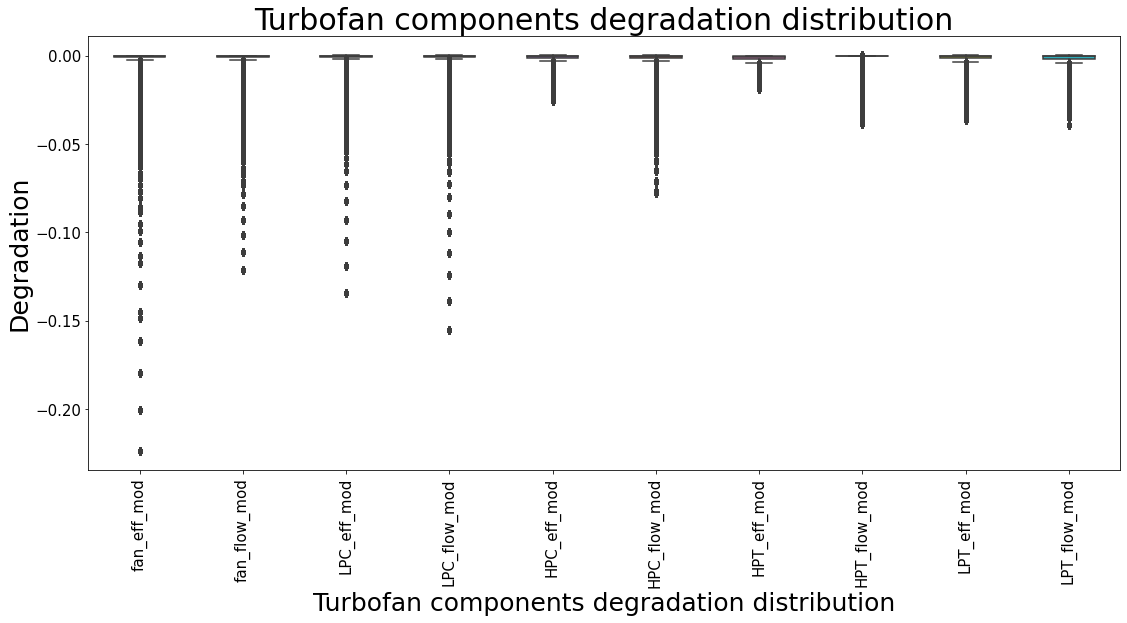

In [13]:
plt.title("Turbofan components degradation distribution", fontsize=30)
plt.xlabel("Turbofan components degradatiom", fontsize=25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

df_deg = df_y[['fan_eff_mod', 'fan_flow_mod', 'LPC_eff_mod', 'LPC_flow_mod',
       'HPC_eff_mod', 'HPC_flow_mod', 'HPT_eff_mod', 'HPT_flow_mod',
       'LPT_eff_mod', 'LPT_flow_mod']].copy()

sns.boxplot(x="variable", y="value", data=pd.melt(df_deg), width=0.5).figure.set_size_inches(18.5, 8)

plt.xlabel('Turbofan components degradation distribution', fontsize=25)
plt.ylabel("Degradation", fontsize=25)
plt.xticks(rotation='vertical')

All health status parameters distribution exceed by far the limit of the 1.5 IQR rule. However, it is explained by the nature of the data, and how dataset was created with the C-MAPSS simulation. Value of the health status degradation for all components were imposed to be 0 for most of the engine units. On the contrary, for a small sample of engine units and flights, imposed degradation reaches values up to 20%.

This is the reason that explains the small value of the interquartile range (IQR), but the huge difference between the median and the extreme values (minimum values in this case, as degradation is defined as negative when engine components are damaged).

The objective of this project is actually detect and quantify this degradation that can affect engine components performance but appears only sometimes, and distinguish it from the health status of non-degraded engine components.

Summarizing, whereas from a mathematical point of view there are a lot of points that could be labelled as 'outliers', the objective of this study is specifically the identification and quantification of them with respect to the nominal engine performance. Therefore, they won't be removed from the dataset.



In [14]:
def plot_variables(data, variables, labels, size, labelsize, option, name=None):
    
    '''
    INPUT:
    data - dataset from which variables to be plotted are extracted (df_X and df_y will be used later on)
    variables - parameters contained in data to be plotted
    labels - y-axis label for each subplot
    size - size of the plot
    labelsize - size of the labels in the plot
    option - parameter that indicates the x-axis parameter:
        - 'cycle': number of cycles will be the independent parameter in the x-axis
        - 'time': time (in seconds) will be the independent parameter in the x-axis

    '''
    
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
                ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
            else:
                time_s = 100*np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)     
    plt.show()
    plt.close()

## 3.2 Correlation analysis

A preliminary analysis of sensitivity between independent and dependent variables is always useful for this kind of analysis. For such purpose, a correlation matrix between the measurements and health status parameters is carried out. Some benefits can be obtained from sensitivity analysis:

    - It would allow the data analyst know in advance the dependent parameters that have more probability to be predicted more easily
    
    - It would allow the data analyst to drop one / a few independent parameters from the analysis, in case the correlation values with the dependent parameters is near zero or very low in comparison with others.
    
In the matriz shown below, it was taken into account the absolute value of the correlation values. Whether correlation values are positive or negative is not really interesting for this analysis, but their magnitude.

<AxesSubplot:>

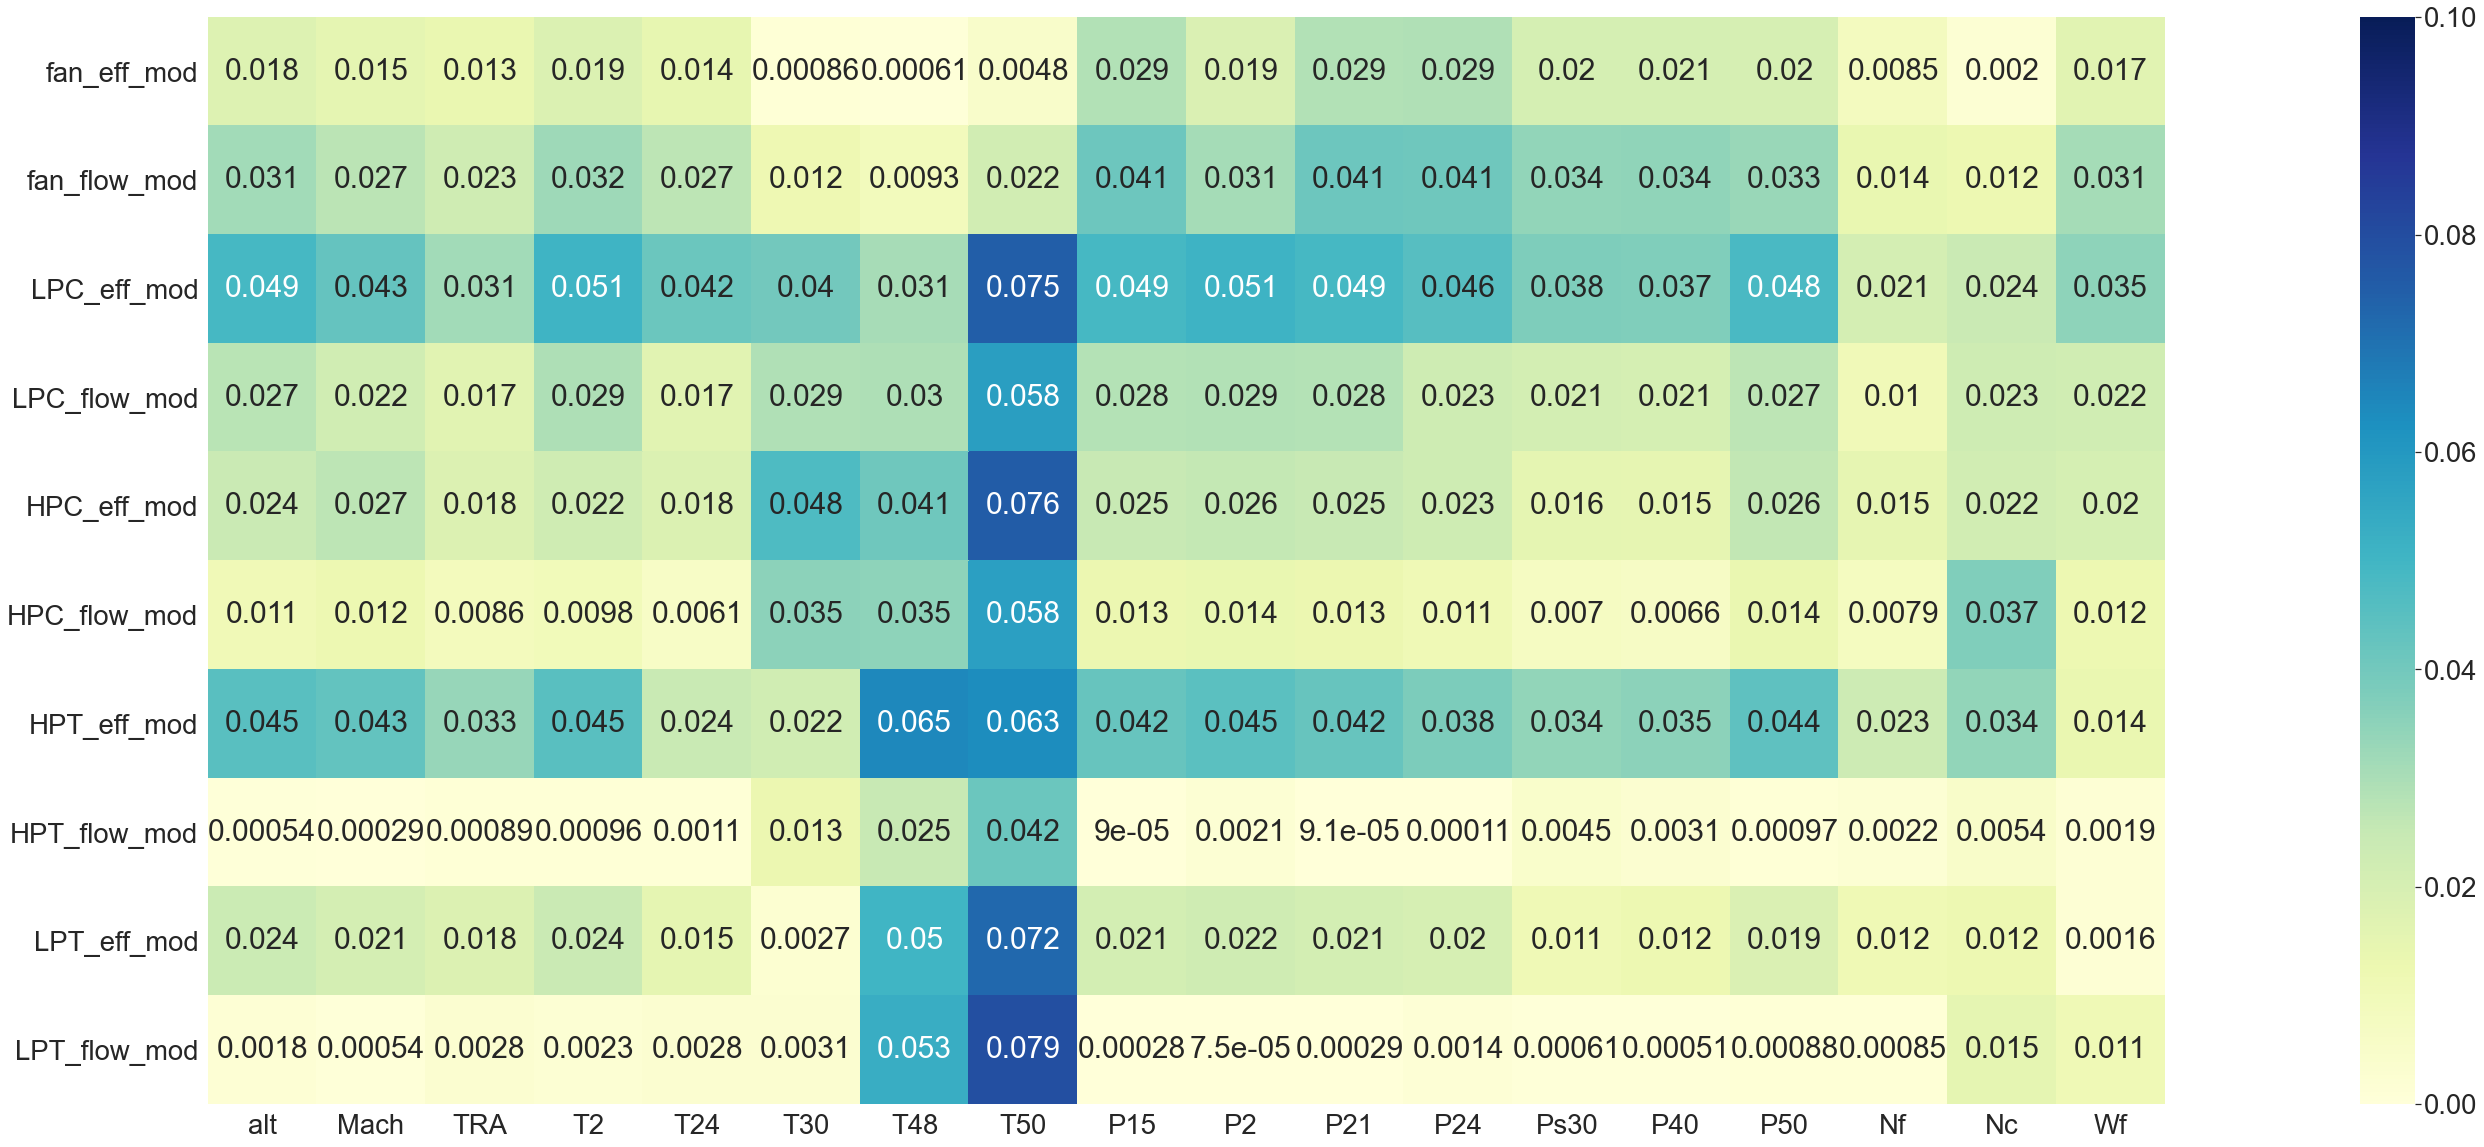

In [15]:
df_X_y = df_X.merge(df_y, how='inner', on=['alt', 'unit', 'cycle'])

fig = plt.figure(figsize = (70,20))
sns.set(font_scale=2.5)
C_mat = df_X_y.corr()
sns.heatmap(np.abs(C_mat.iloc[20:30, 0:18]), vmin = 0, vmax = .1, cmap="YlGnBu", annot=True, square = True)

## 3.3 Flight profile analysis

Data gathered from the turbofans subject of analysis correspond to different flight. Profile of these flight are different between each unit and each flight (cycle). "Altitude", "Mach Number", "Throttle Resolver Angle" and "Fan Inlet Temperature" profiles for a specific turbofan unit and cycle are shown below. It is possible to represent the same graphics for all units and flights in the dataset.

<Figure size 432x288 with 0 Axes>

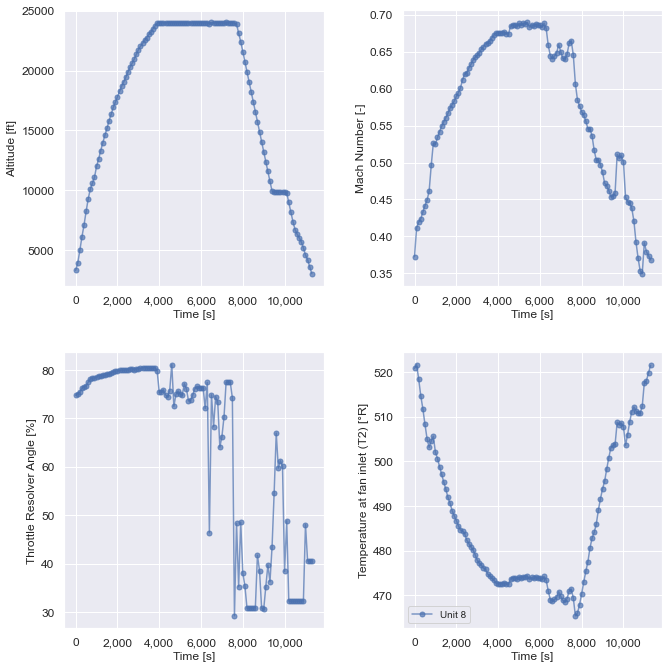

In [16]:
subset = df_X.loc[(df_X.unit == 8) & (df_X.cycle == 5)]
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_variables(subset, ['alt','Mach','TRA','T2'], labels, 10, 12, 'a')

## 3.4 Degradation analysis

Below are represented and compared the evolution of the health status parameters for some engine units throughout the analyzed cycles (flights). Engine units used for this plots correspond to all engines from dataset N-CMAPSS_DS08c-008.h5' (engine units 90 to 99 in the merged dataset). A similar analysis can be done for whatever combination of units in the merged dataset.

### 3.4.1 Turbofan efficiency 

<Figure size 432x288 with 0 Axes>

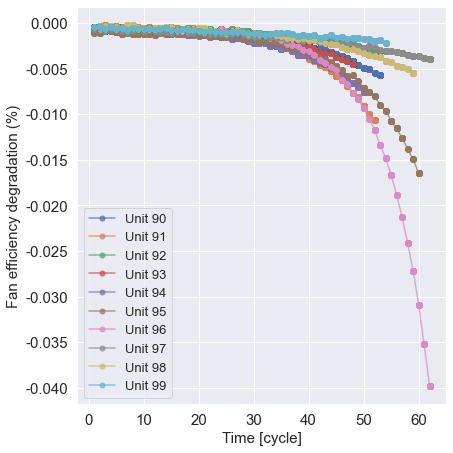

In [17]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['fan_eff_mod'], [r'Fan efficiency degradation (%)'], 7, 15, 'cycle')

### 3.4.2 Turbofan airflow 

<Figure size 432x288 with 0 Axes>

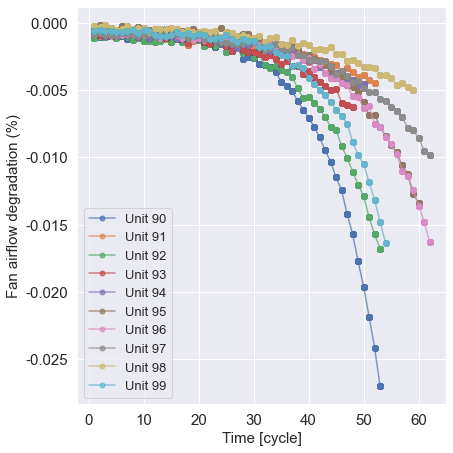

In [18]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['fan_flow_mod'], [r'Fan airflow degradation (%)'], 7, 15, 'cycle')

### 3.4.3 Low pressure compressor efficiency 

<Figure size 432x288 with 0 Axes>

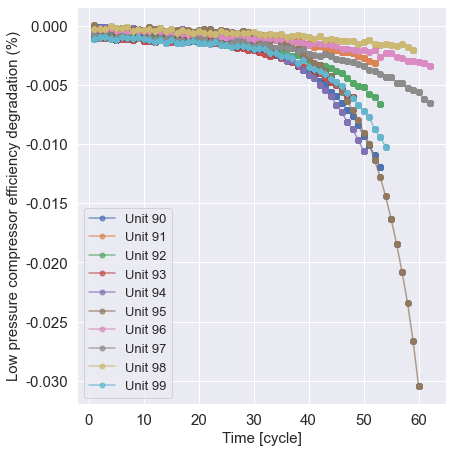

In [19]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['LPC_eff_mod'], [r'Low pressure compressor efficiency degradation (%)'], 7, 15, 'cycle')

### 3.4.4 Low pressure compressor airflow

<Figure size 432x288 with 0 Axes>

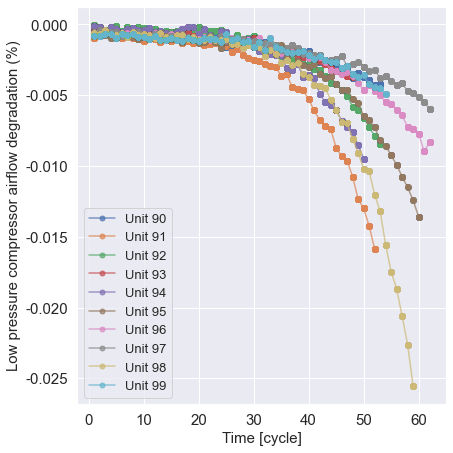

In [20]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['LPC_flow_mod'], [r'Low pressure compressor airflow degradation (%)'], 7, 15, 'cycle')

### 3.4.5 High pressure compressor efficiency 

<Figure size 432x288 with 0 Axes>

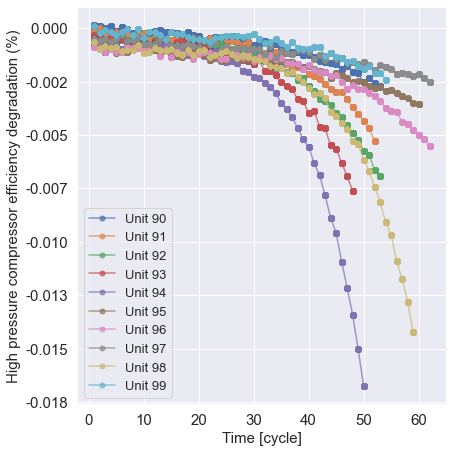

In [21]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['HPC_eff_mod'], [r'High pressure compressor efficiency degradation (%)'], 7, 15, 'cycle')

### 3.4.6 High pressure compressor airflow

<Figure size 432x288 with 0 Axes>

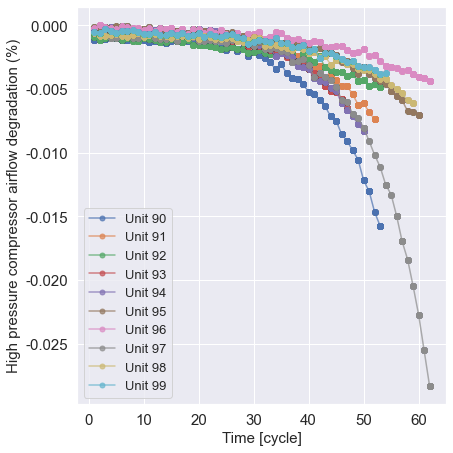

In [22]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['HPC_flow_mod'], [r'High pressure compressor airflow degradation (%)'], 7, 15, 'cycle')

### 3.4.7 High pressure turbine efficiency 

<Figure size 432x288 with 0 Axes>

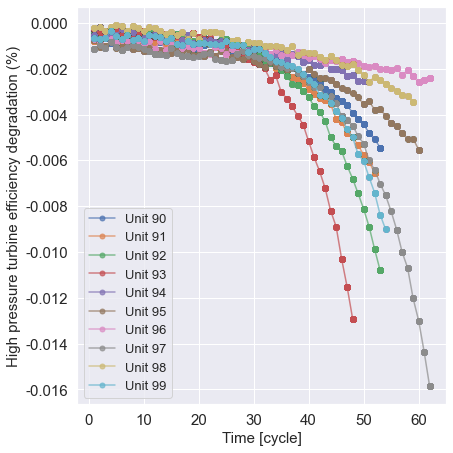

In [23]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['HPT_eff_mod'], [r'High pressure turbine efficiency degradation (%)'], 7, 15, 'cycle')

### 3.4.8 High pressure turbine airflow

<Figure size 432x288 with 0 Axes>

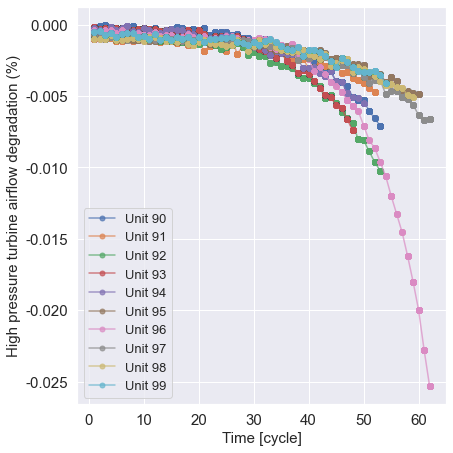

In [24]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['HPT_flow_mod'], [r'High pressure turbine airflow degradation (%)'], 7, 15, 'cycle')

### 3.4.9 Low pressure turbine efficiency 

<Figure size 432x288 with 0 Axes>

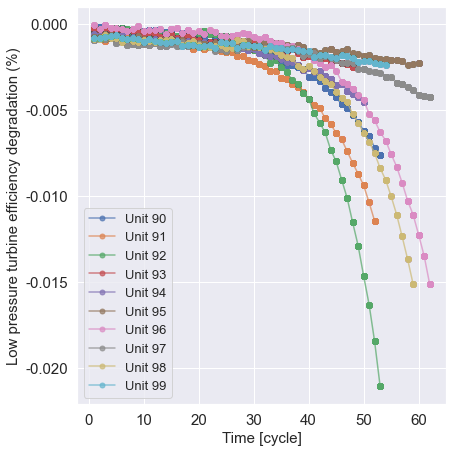

In [25]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['LPT_eff_mod'], [r'Low pressure turbine efficiency degradation (%)'], 7, 15, 'cycle')

### 3.4.10 Low pressure turbine airflow

<Figure size 432x288 with 0 Axes>

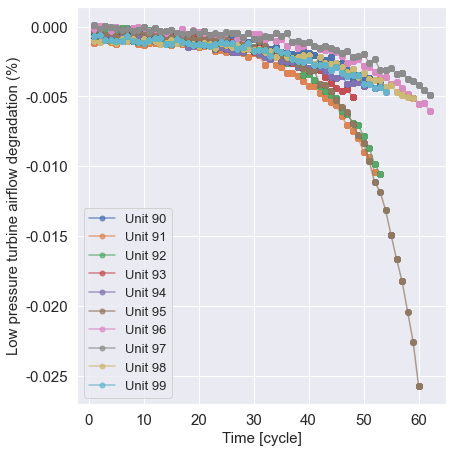

In [26]:
subset = df_y.loc[(df_y.unit == 90) | (df_y.unit == 91) | (df_y.unit == 92) | (df_y.unit == 93) |
                  (df_y.unit == 94) | (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) |
                  (df_y.unit == 98) | (df_y.unit == 99)]

subset.reset_index(inplace=True, drop=True)
plot_variables(subset, ['LPT_flow_mod'], [r'Low pressure turbine airflow degradation (%)'], 7, 15, 'cycle')

# 4 Definition of train and test sets

## 4.1 Selection of train and test engine units

Instead of selecting random rows, selection of train and test sets will be made manually, based on the results of the exploratory analysis. More specifically, from each original dataset, data generated by about 20% of the units (engines) will be used as test sets. On the one hand, by doing this it is ensured that all datasets have contribution to the final test set. On the other hand, this approach is a good simulation of the application of machine learning applied to predictive maintenance of turbofans: the train set represents the data generated by the engine model, whereas the test data simulates data gathered by real, in-service engines whose health status is desired to be predicted.

In the end, from each dataset, the following engine units were chosen as test sets:


    - 'N-CMAPSS_DS01-005.h5': unit 2 and 4
    - 'N-CMAPSS_DS02-006.h5': unit 12 and 13
    - 'N-CMAPSS_DS03-012.h5': unit 21, 22 and 34
    - 'N-CMAPSS_DS04.h5': unit 34 and unit 36
    - 'N-CMAPSS_DS05.h5': unit 36 and 43
    - 'N-CMAPSS_DS06.h5': unit 50 and 54
    - 'N-CMAPSS_DS07.h5': unit 66 and 70
    - 'N-CMAPSS_DS08a-009.h5':  unit 75, 84 and 85
    - 'N-CMAPSS_DS08c-008.h5': unit 91 and 99

A basic requirement for the selection of the train and test sets is that those engine units that were subject of the highest levels of degradation are always included in the train sets. If a high level of degradation in a particular component is only allocated to the test set, and not to the train set, it could lead the machine learning model to a much worse result.

From the point of view of the application of the machine learning model to predictive maintenance, a good approach is to generate a lot of data from the engine model, covering a wide range of degradation for each component (from no degradation to high level of degradation) together with as many combinations as possible. 

In [27]:
X_train_array = df_X.loc[(df_X.unit == 1) | (df_X.unit == 3) | (df_X.unit == 5) | \
                         (df_X.unit == 6) | (df_X.unit == 7) | (df_X.unit == 8) | \
                         (df_X.unit == 9) | (df_X.unit == 10) | (df_X.unit == 11) | \
                         (df_X.unit == 14) | (df_X.unit == 15) | (df_X.unit == 16) | \
                         (df_X.unit == 17) | (df_X.unit == 18) | (df_X.unit == 19) | \
                         (df_X.unit == 20) | (df_X.unit == 23) | (df_X.unit == 24) | \
                         (df_X.unit == 25) | (df_X.unit == 26) | (df_X.unit == 27) | \
                         (df_X.unit == 28) | (df_X.unit == 29) | (df_X.unit == 30) | \
                         (df_X.unit == 31) | (df_X.unit == 32) | (df_X.unit == 33) | \
                         (df_X.unit == 35) | (df_X.unit == 37) | (df_X.unit == 38) | \
                         (df_X.unit == 39) | (df_X.unit == 40) | (df_X.unit == 41) | \
                         (df_X.unit == 42) | (df_X.unit == 44) | (df_X.unit == 45) | \
                         (df_X.unit == 46) | (df_X.unit == 47) | (df_X.unit == 48) | \
                         (df_X.unit == 49) | (df_X.unit == 51) | (df_X.unit == 52) | \
                         (df_X.unit == 53) | (df_X.unit == 55) | (df_X.unit == 57) | \
                         (df_X.unit == 58) | (df_X.unit == 59) | (df_X.unit == 60) | \
                         (df_X.unit == 61) | (df_X.unit == 62) | (df_X.unit == 63) | \
                         (df_X.unit == 65) | (df_X.unit == 67) | (df_X.unit == 68) | \
                         (df_X.unit == 69) | (df_X.unit == 71) | (df_X.unit == 72) | \
                         (df_X.unit == 73) | (df_X.unit == 74) | (df_X.unit == 76) | \
                         (df_X.unit == 77) | (df_X.unit == 78) | (df_X.unit == 79) | \
                         (df_X.unit == 80) | (df_X.unit == 81) | (df_X.unit == 82) | \
                         (df_X.unit == 83) | (df_X.unit == 86) | (df_X.unit == 87) | \
                         (df_X.unit == 88) | (df_X.unit == 89) | (df_X.unit == 90) | \
                         (df_X.unit == 92) | (df_X.unit == 93) | (df_X.unit == 94) | \
                         (df_X.unit == 95) | (df_X.unit == 96) | (df_X.unit == 97) | \
                         (df_X.unit == 98)]

In [28]:
X_test_array = df_X.loc[(df_X.unit == 2) | (df_X.unit == 4) | (df_X.unit == 12) | \
                         (df_X.unit == 13) | (df_X.unit == 21) | (df_X.unit == 22) | \
                         (df_X.unit == 34) | (df_X.unit == 36) | (df_X.unit == 43) | \
                         (df_X.unit == 50) | (df_X.unit == 54) | (df_X.unit == 56) | \
                         (df_X.unit == 64) | (df_X.unit == 66) | (df_X.unit == 75) | \
                         (df_X.unit == 84) | (df_X.unit == 85) | (df_X.unit == 91) | \
                         (df_X.unit == 99) ]


In [29]:
y_train_array = df_y.loc[(df_y.unit == 1) | (df_y.unit == 3) | (df_y.unit == 5) | \
                         (df_y.unit == 6) | (df_y.unit == 7) | (df_y.unit == 8) | \
                         (df_y.unit == 9) | (df_y.unit == 10) | (df_y.unit == 11) | \
                         (df_y.unit == 14) | (df_y.unit == 15) | (df_y.unit == 16) | \
                         (df_y.unit == 17) | (df_y.unit == 18) | (df_y.unit == 19) | \
                         (df_y.unit == 20) | (df_y.unit == 23) | (df_y.unit == 24) | \
                         (df_y.unit == 25) | (df_y.unit == 26) | (df_y.unit == 27) | \
                         (df_y.unit == 28) | (df_y.unit == 29) | (df_y.unit == 30) | \
                         (df_y.unit == 31) | (df_y.unit == 32) | (df_y.unit == 33) | \
                         (df_y.unit == 35) | (df_y.unit == 37) | (df_y.unit == 38) | \
                         (df_y.unit == 39) | (df_y.unit == 40) | (df_y.unit == 41) | \
                         (df_y.unit == 42) | (df_y.unit == 44) | (df_y.unit == 45) | \
                         (df_y.unit == 46) | (df_y.unit == 47) | (df_y.unit == 48) | \
                         (df_y.unit == 49) | (df_y.unit == 51) | (df_y.unit == 52) | \
                         (df_y.unit == 53) | (df_y.unit == 55) | (df_y.unit == 57) | \
                         (df_y.unit == 58) | (df_y.unit == 59) | (df_y.unit == 60) | \
                         (df_y.unit == 61) | (df_y.unit == 62) | (df_y.unit == 63) | \
                         (df_y.unit == 65) | (df_y.unit == 67) | (df_y.unit == 68) | \
                         (df_y.unit == 69) | (df_y.unit == 71) | (df_y.unit == 72) | \
                         (df_y.unit == 73) | (df_y.unit == 74) | (df_y.unit == 76) | \
                         (df_y.unit == 77) | (df_y.unit == 78) | (df_y.unit == 79) | \
                         (df_y.unit == 80) | (df_y.unit == 81) | (df_y.unit == 82) | \
                         (df_y.unit == 83) | (df_y.unit == 86) | (df_y.unit == 87) | \
                         (df_y.unit == 88) | (df_y.unit == 89) | (df_y.unit == 90) | \
                         (df_y.unit == 92) | (df_y.unit == 93) | (df_y.unit == 94) | \
                         (df_y.unit == 95) | (df_y.unit == 96) | (df_y.unit == 97) | \
                         (df_y.unit == 98)]

In [30]:
y_test_array = df_y.loc[(df_y.unit == 2) | (df_y.unit == 4) | (df_y.unit == 12) | \
                         (df_y.unit == 13) | (df_y.unit == 21) | (df_y.unit == 22) | \
                         (df_y.unit == 34) | (df_y.unit == 36) | (df_y.unit == 43) | \
                         (df_y.unit == 50) | (df_y.unit == 54) | (df_y.unit == 56) | \
                         (df_y.unit == 64) | (df_y.unit == 66) | (df_y.unit == 75) | \
                         (df_y.unit == 84) | (df_y.unit == 85) | (df_y.unit == 91) | \
                         (df_y.unit == 99)]

In [31]:
X_train=pd.DataFrame(X_train_array, columns=df_X_cols) 
X_train.reset_index(inplace=True)
X_test=pd.DataFrame(X_test_array, columns=df_X_cols)
X_test.reset_index(inplace=True)
y_train=pd.DataFrame(y_train_array, columns=df_y_cols)
y_train.reset_index(inplace=True)
y_test=pd.DataFrame(y_test_array, columns=df_y_cols)
y_test.reset_index(inplace=True)

## 4.2 Storage of "unit" and "cycle" columns

Columns "unit" and "cycle" are not interesting from the point of view of health status parameters prognostics as machine learning algorithms inputs or output, therefore they will be dropped from the train and test sets.

However, this information will be useful for the comparison of the performance between different machine learning methods. For this reason, these columns will be stored as separate datasets, and will be merged later on to the train and test sets, as well as to the calculated outputs of the machine learning algorithms.

In [32]:
X_train_unit_cycle = X_train[['unit', 'cycle']].copy()
X_test_unit_cycle = X_test[['unit', 'cycle']].copy()
y_train_unit_cycle = y_train[['unit', 'cycle']].copy()
y_test_unit_cycle = y_test[['unit', 'cycle']].copy()

## 4.3 Removal of columns not needed for machine learning algorithms

Columns "unit" and "cycle" in both df_X and df_y were very interesting from the point of view of data exploratory, as well as for the train and test selection criteria. However, they are not useful for our machine learning model. Therefore, they will be dropped from X_train, X_test, y_train and y_test datasets. Columns "index", created during the reset of the indexes, will also be dropped from X_train, X_test, y_train and y_test.

In [33]:
# Drop "unit" column frm X_train, X_test, y_train and y_test datasets
X_train.drop("unit",axis=1,inplace=True)
X_test.drop("unit",axis=1,inplace=True)
y_train.drop("unit",axis=1,inplace=True)
y_test.drop("unit",axis=1,inplace=True)

In [34]:
# Drop "cycle" column from X_train, X_test, y_train and y_test datasets
X_train.drop("cycle",axis=1,inplace=True)
X_test.drop("cycle",axis=1,inplace=True)
y_train.drop("cycle",axis=1,inplace=True)
y_test.drop("cycle",axis=1,inplace=True)

In [35]:
# Drop "index" column from X_train, X_test, y_train and y_test datasets
X_train.drop("index",axis=1,inplace=True)
X_test.drop("index",axis=1,inplace=True)
y_train.drop("index",axis=1,inplace=True)
y_test.drop("index",axis=1,inplace=True)

Column "alt" was introduced as auxiliary column in the y set. As it is not included in the target variables, it will be dropped from y_train and y_test datasets. It will remain in the X_train and X_test sets as it is one of the inputs of the machine learning models.

In [36]:
y_train.drop("alt",axis=1,inplace=True)
y_test.drop("alt",axis=1,inplace=True)

## 4.4 Check size of datasets X_train, X_test, y_train, y_test

It is always interesting to check the size of the X_train, X_test, y_train and y_test sets

In [37]:
print("X_train size is ",X_train.shape)
print("X_test size is ",X_test.shape)
print("y_train size is ",y_train.shape)
print("y_test size is ",y_test.shape)

X_train size is  (552088, 18)
X_test size is  (136263, 18)
y_train size is  (552088, 10)
y_test size is  (136263, 10)


# 5 Machine learning models

## 5.1 Multiple polynomial regression model, degree 2

A pipeline that consists on a multiple polynomial regression of degree 2 is created. Polynomial regression model makes use of the Python sklearn PolynomialFeatures toolbox. Input data are normalized thanks to the  Python sklearn StandardScaler feature.

In [38]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]
pipe=Pipeline(Input)

In [39]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [40]:
Yhat_test_g2 = pipe.predict(X_test)
Yhat_train_g2 = pipe.predict(X_train)
train_score_g2 = r2_score(y_train, Yhat_train_g2)
test_score_g2 = r2_score(y_test, Yhat_test_g2)

In [41]:
train_score_g2

0.8881484805601343

In [42]:
test_score_g2

0.8184607632876059

In [43]:
# R2_score for each health status parameter will be calculated independently

# First step is to transform Yhat_test_g2 into a dataframe

y_headers = y_test.columns
Yhat_test_g2_df = pd.DataFrame(Yhat_test_g2, columns = y_headers)

test_score_params_g2 = []

# Then, r2_score values for each health status is calculated and stored in test_score_params_g2

for col in y_test:
    test_score = r2_score(y_test[col], Yhat_test_g2_df[col])
    test_score_params_g2.append(test_score)
    print(col)
    print(test_score)
    print()  

fan_eff_mod
0.9705689672059096

fan_flow_mod
0.9606474353726874

LPC_eff_mod
0.805746618127092

LPC_flow_mod
0.5403673505155969

HPC_eff_mod
0.9783228511834636

HPC_flow_mod
0.9741601884239752

HPT_eff_mod
0.8141762339790449

HPT_flow_mod
0.8956918340760818

LPT_eff_mod
0.7483611887424416

LPT_flow_mod
0.4965649652497621



## 5.2 Multiple polynomial regression model, degree 3

A pipeline that consists on a multiple polynomial regression of degree 3 is created. Polynomial regression model makes use of the Python sklearn PolynomialFeatures toolbox. Input data are normalized thanks to the Python sklearn StandardScaler feature.

In [44]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=3)),('mode',LinearRegression())]
pipe=Pipeline(Input)

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('mode', LinearRegression())])

In [46]:
Yhat_test_g3 = pipe.predict(X_test)
Yhat_train_g3 = pipe.predict(X_train)
train_score_g3 = r2_score(y_train, Yhat_train_g3)
test_score_g3 = r2_score(y_test, Yhat_test_g3)

In [47]:
train_score_g3

0.9368964100999657

In [48]:
test_score_g3

0.8821767874060408

In [49]:
# R2_score for each health status parameter will be calculated independently

# First step is to transform Yhat_test_g3 into a dataframe

y_headers = y_test.columns
Yhat_test_g3_df = pd.DataFrame(Yhat_test_g3, columns = y_headers)

test_score_params_g3 = []

# Then, r2_score values for each health status is calculated and stored in test_score_params_g3

for col in y_test:
    test_score = r2_score(y_test[col], Yhat_test_g3_df[col])
    test_score_params_g3.append(test_score)
    print(col)
    print(test_score)
    print()  

fan_eff_mod
0.9759861506848528

fan_flow_mod
0.9761505863994201

LPC_eff_mod
0.9130794914436338

LPC_flow_mod
0.8513425679170202

HPC_eff_mod
0.9895762746600988

HPC_flow_mod
0.9737213496525943

HPT_eff_mod
0.8403646620034991

HPT_flow_mod
0.9524160974321932

LPT_eff_mod
0.7898013765829601

LPT_flow_mod
0.5593293172841358



## 5.3 Neural network model

Python Keras toolbox is used for this neural network model. The network consists on a first layer of 18 nodes (size of the input), two intermediate layers of 32 nodes, and a final layer of 10 nodes (size of the output). Other features of the neural network are shown below:

    - A dropout of 12% between the two intermediate layers is imposed, which prevents the model from overfitting
    - Activation function for all layers, except the last one, is "relu" (rectified lineal unit activation function)
    - Optimizer used is "adam"
    - Loss function is "mean_squared_error"

Prior to feeding the model, the inputs are normalized by using sklearn StandardScaler.

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
model = Sequential()
model.add(Dense(32, input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.12))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
history = model.fit(X_train, y_train, epochs=2000, verbose=1, batch_size=256)

Epoch 1/2000
2157/2157 [==============================] - 3s 1ms/step - loss: 2.5435e-05
Epoch 2/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 1.4149e-05
Epoch 3/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 9.7121e-06
Epoch 4/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 8.3424e-06A: 0s - l
Epoch 5/2000
2157/2157 [==============================] - 3s 1ms/step - loss: 7.2976e-06
Epoch 6/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 6.8481e-06
Epoch 7/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 6.5275e-06
Epoch 8/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 6.3400e-06
Epoch 9/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 6.0438e-06
Epoch 10/2000
2157/2157 [==============================] - 2s 1ms/step - loss: 5.7673e-06
Epoch 11/2000
2157/2157 [==============================] - 3s 1ms/step - loss: 5.5542e-06
Epoch 12/2

In [53]:
# Check model's performancey_pred = model.predict(X_test)

Yhat_test_nn = model.predict(X_test)
Yhat_train_nn = model.predict(X_train)
train_score_nn = r2_score(y_train, Yhat_train_nn)
test_score_nn = r2_score(y_test, Yhat_test_nn)

In [54]:
train_score_nn

0.9022634420455017

In [55]:
test_score_nn

0.6790774252421337

In [56]:
# R2_score for each health status parameter will be calculated independently


# First step is to transform Yhat_test_nn into a dataframe

y_headers = y_test.columns
Yhat_test_nn_df = pd.DataFrame(Yhat_test_nn, columns = y_headers)

test_score_params_nn = []

# Then, r2_score values for each health status is calculated and stored in test_score_params_nn

for col in y_test:
    test_score = r2_score(y_test[col], Yhat_test_nn_df[col])
    test_score_params_nn.append(test_score)
    print(col)
    print(test_score)
    print() 

fan_eff_mod
0.8988823177532997

fan_flow_mod
0.8863038946126087

LPC_eff_mod
0.5221073059985466

LPC_flow_mod
0.22394516622999394

HPC_eff_mod
0.9136491997326561

HPC_flow_mod
0.9322055862648448

HPT_eff_mod
0.7868664138983034

HPT_flow_mod
0.3589315236890851

LPT_eff_mod
0.6835745112700828

LPT_flow_mod
0.584308332971929



# 6 Maching learning models discussion and comparative

## 6.1 R-score comparative

R-score values obtained for each health status parameter by the three machine learning methods discussed in the project are compared in the histagram below

In [57]:
labels = ["Fan eff", "Fan airflow", "LPC eff", "LPC airflow",
         "HPC eff", "HPC airflow", "HPT eff", "HPT airflow",
         "LPT eff", "LPT airflow"]

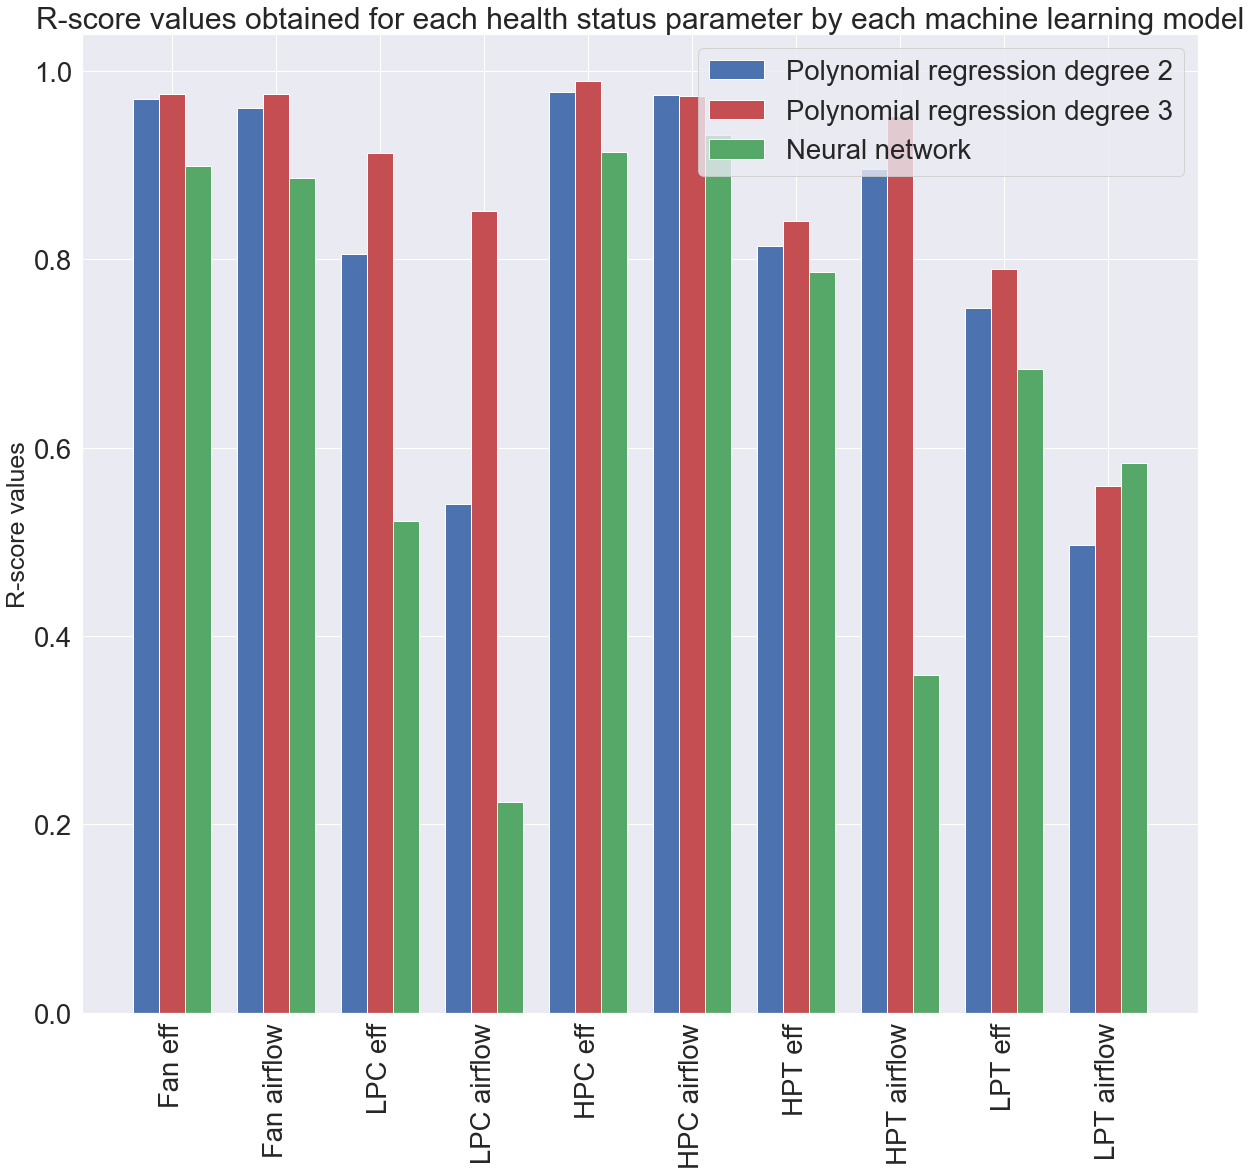

In [58]:
# set width of bars
barWidth = 0.25

plt.figure(figsize=(20,18))

# Set position of bar on X axis
r1 = np.arange(len(test_score_params_g2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, test_score_params_g2, color='b', width=barWidth, edgecolor='white', label='Polynomial regression degree 2')
plt.bar(r2, test_score_params_g3, color='r', width=barWidth, edgecolor='white', label='Polynomial regression degree 3')
plt.bar(r3, test_score_params_nn, color='g', width=barWidth, edgecolor='white', label='Neural network')
 
# Add xticks on the middle of the group bars
plt.ylabel('R-score values', fontsize = 25)
plt.title('R-score values obtained for each health status parameter by each machine learning model', fontsize = 30)
plt.xticks([r + barWidth for r in range(len(test_score_params_g2))], labels)
 
# Create legend & Show graphic
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

## 6.2 Comparative of health status parameters degradation

The degradation of health status calculated by each machine learning method can also be represented in time series graphics.

In a first step, all health status degradation calculated by each machine learning model will be merged into the same dataframe. Name of the columns will be modified by adding the suffix -g2, -g3 and -nn in order to identify them. Columns "unit" and "cycle", removed from the input dataset in the paragraph 4.4, will also be merged. This will make easier the data visualization.

In [59]:
y_test = y_test.add_suffix('_real')
Yhat_test_g2_df = Yhat_test_g2_df.add_suffix('_g2')
Yhat_test_g3_df = Yhat_test_g3_df.add_suffix('_g3')
Yhat_test_nn_df = Yhat_test_nn_df.add_suffix('_nn')


Second step is to merge the columns "unit" and "cycle", removed from the input dataset in the paragraph 4.3. This will make easier the data visualization.

In [60]:
Yhat_test = y_test.join(Yhat_test_g2_df.join(Yhat_test_g3_df.join(Yhat_test_nn_df.join(y_test_unit_cycle))))


From now on, it is possible to check the evolution of the health status parameters degradation throughout the cycles (flights), comparing the real results and those obtained by each machine learning model. This can be done for all engine units belonging to the test dataset. Evolution and comparison of all health status parameters for engine unit 84 are shown below. For the rest of the engine units of the test set it is possible to do the same by changing a single command line.

<Figure size 432x288 with 0 Axes>

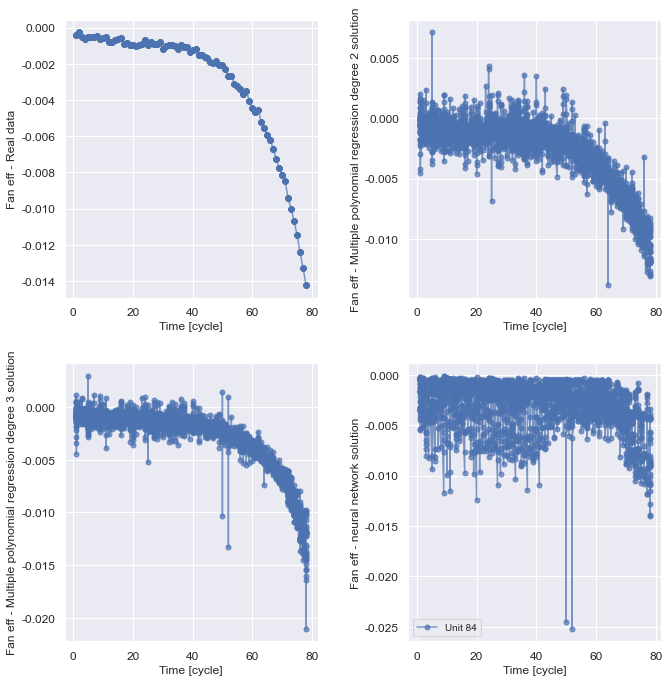

In [61]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['Fan eff - Real data', 'Fan eff - Multiple polynomial regression degree 2 solution', 
          'Fan eff - Multiple polynomial regression degree 3 solution', 
          'Fan eff - neural network solution']
plot_variables(subset, ['fan_eff_mod_real', 'fan_eff_mod_g2','fan_eff_mod_g3','fan_eff_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

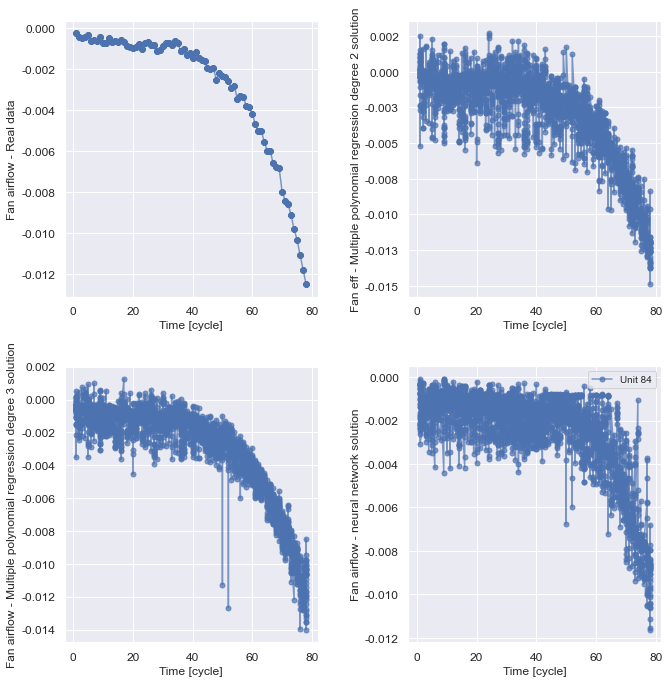

In [62]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['Fan airflow - Real data', 'Fan eff - Multiple polynomial regression degree 2 solution', 
          'Fan airflow - Multiple polynomial regression degree 3 solution', 
          'Fan airflow - neural network solution']
plot_variables(subset, ['fan_flow_mod_real', 'fan_flow_mod_g2','fan_flow_mod_g3','fan_flow_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

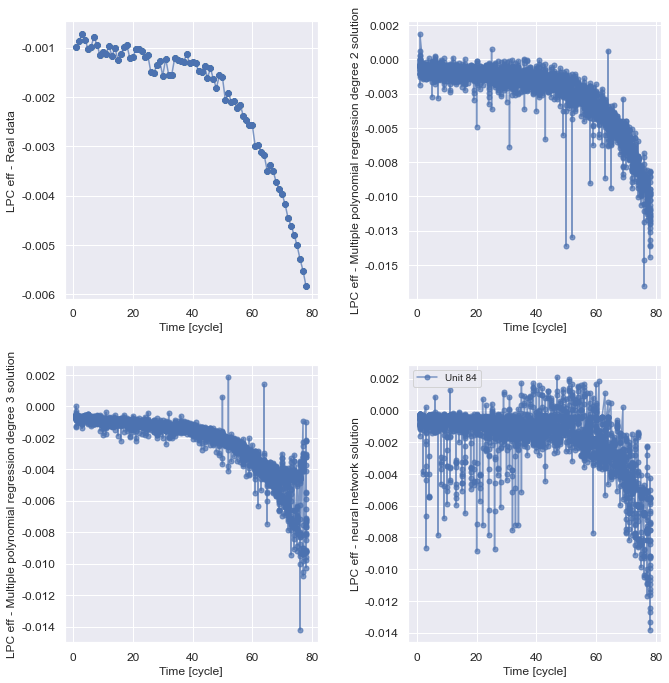

In [63]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['LPC eff - Real data', 'LPC eff - Multiple polynomial regression degree 2 solution', 
          'LPC eff - Multiple polynomial regression degree 3 solution', 
          'LPC eff - neural network solution']
plot_variables(subset, ['LPC_eff_mod_real', 'LPC_eff_mod_g2','LPC_eff_mod_g3','LPC_eff_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

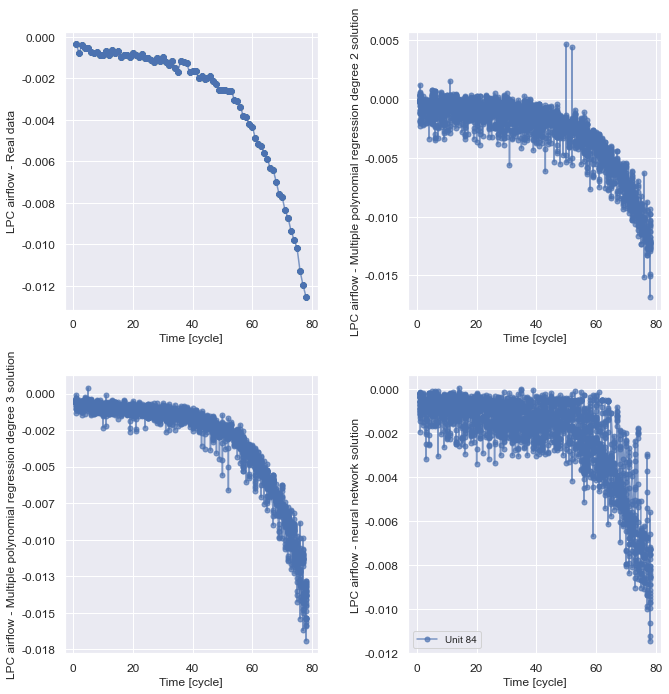

In [64]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['LPC airflow - Real data', 'LPC airflow - Multiple polynomial regression degree 2 solution', 
          'LPC airflow - Multiple polynomial regression degree 3 solution', 
          'LPC airflow - neural network solution']
plot_variables(subset, ['LPC_flow_mod_real', 'LPC_flow_mod_g2','LPC_flow_mod_g3','LPC_flow_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

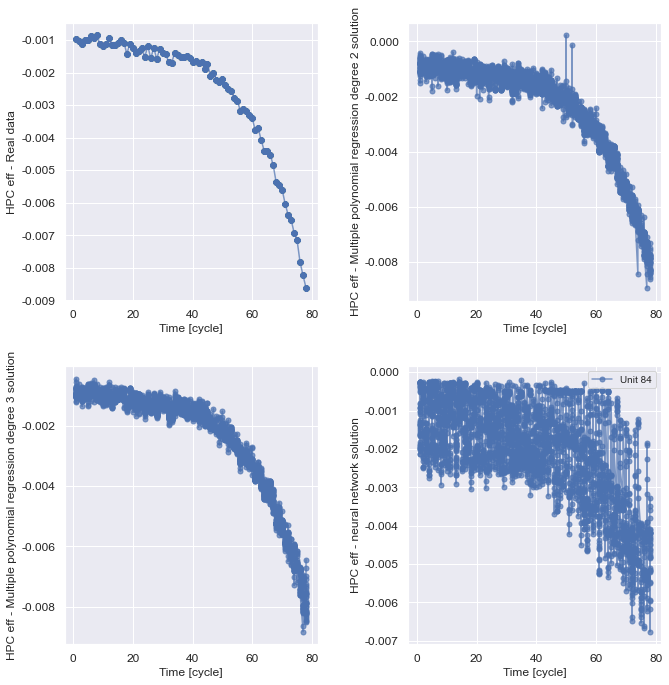

In [65]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['HPC eff - Real data', 'HPC eff - Multiple polynomial regression degree 2 solution', 
          'HPC eff - Multiple polynomial regression degree 3 solution', 
          'HPC eff - neural network solution']
plot_variables(subset, ['HPC_eff_mod_real', 'HPC_eff_mod_g2','HPC_eff_mod_g3','HPC_eff_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

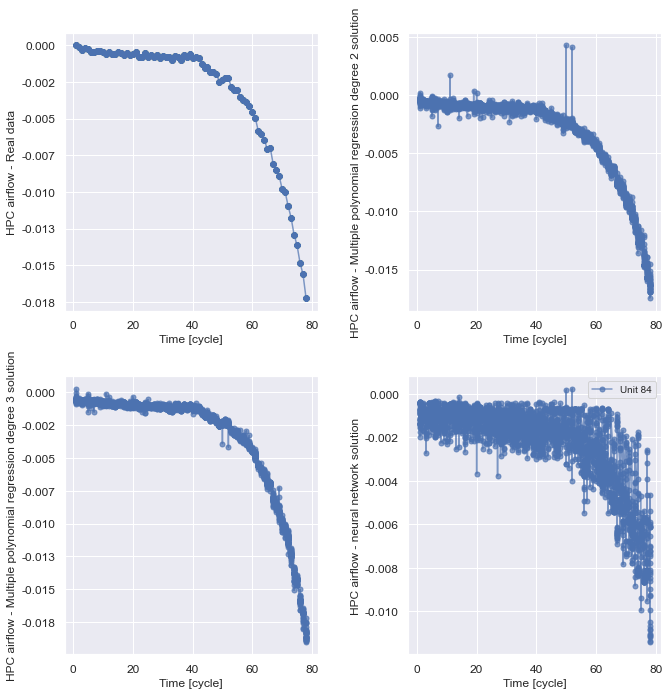

In [66]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['HPC airflow - Real data', 'HPC airflow - Multiple polynomial regression degree 2 solution', 
          'HPC airflow - Multiple polynomial regression degree 3 solution', 
          'HPC airflow - neural network solution']
plot_variables(subset, ['HPC_flow_mod_real', 'HPC_flow_mod_g2','HPC_flow_mod_g3','HPC_flow_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

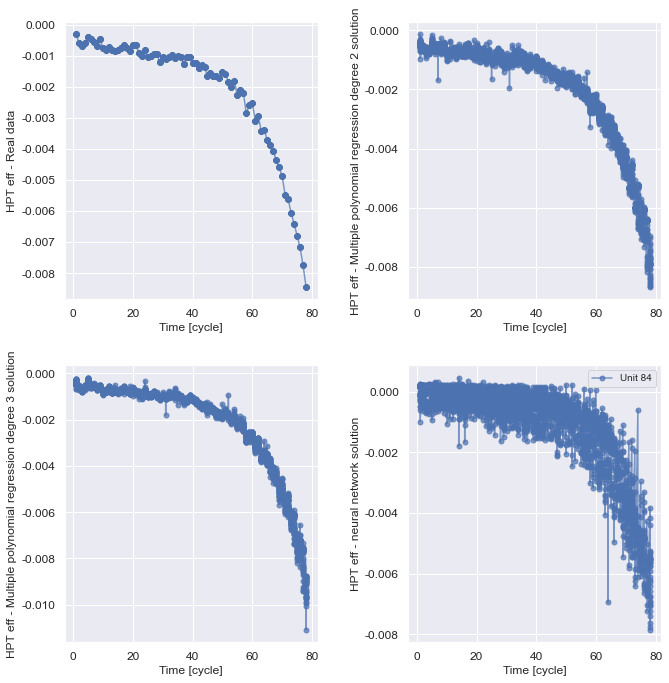

In [67]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['HPT eff - Real data', 'HPT eff - Multiple polynomial regression degree 2 solution', 
          'HPT eff - Multiple polynomial regression degree 3 solution', 
          'HPT eff - neural network solution']
plot_variables(subset, ['HPT_eff_mod_real', 'HPT_eff_mod_g2','HPT_eff_mod_g3','HPT_eff_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

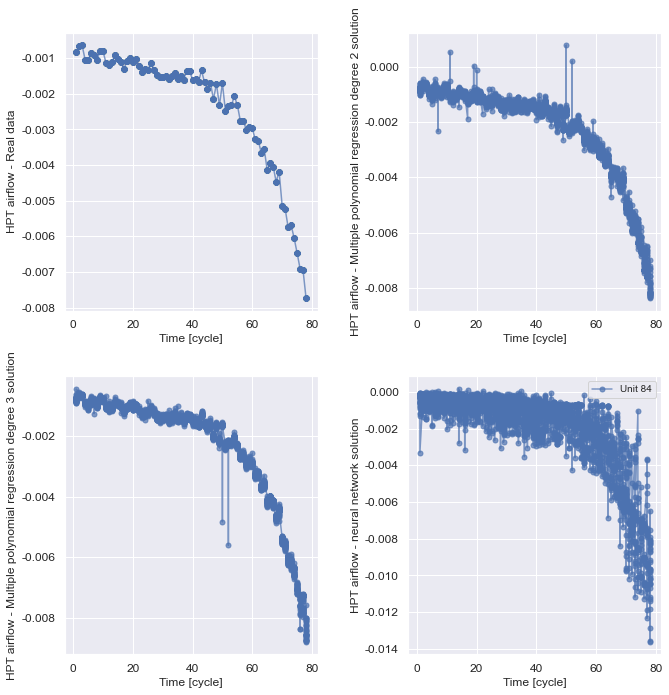

In [68]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['HPT airflow - Real data', 'HPT airflow - Multiple polynomial regression degree 2 solution', 
          'HPT airflow - Multiple polynomial regression degree 3 solution', 
          'HPT airflow - neural network solution']
plot_variables(subset, ['HPT_flow_mod_real', 'HPT_flow_mod_g2','HPT_flow_mod_g3','HPT_flow_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

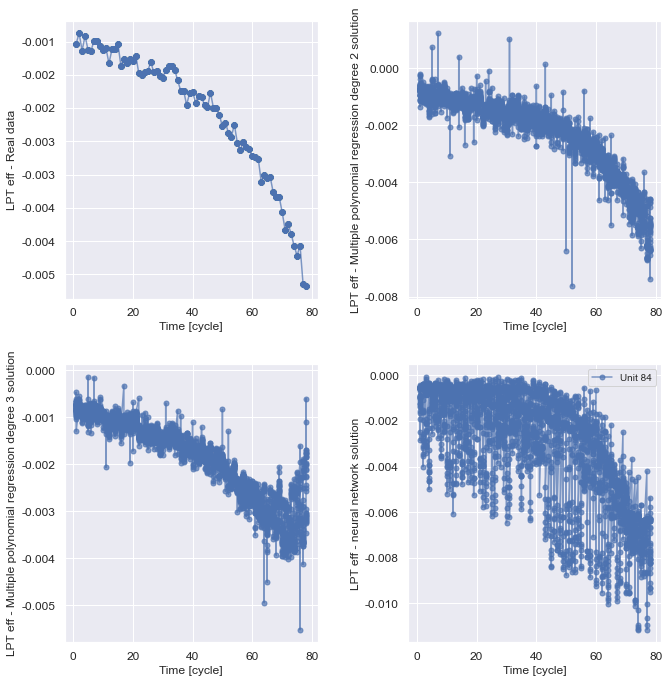

In [69]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['LPT eff - Real data', 'LPT eff - Multiple polynomial regression degree 2 solution', 
          'LPT eff - Multiple polynomial regression degree 3 solution', 
          'LPT eff - neural network solution']
plot_variables(subset, ['LPT_eff_mod_real', 'LPT_eff_mod_g2','LPT_eff_mod_g3','LPT_eff_mod_nn'], labels, 10, 12, 'cycle')

<Figure size 432x288 with 0 Axes>

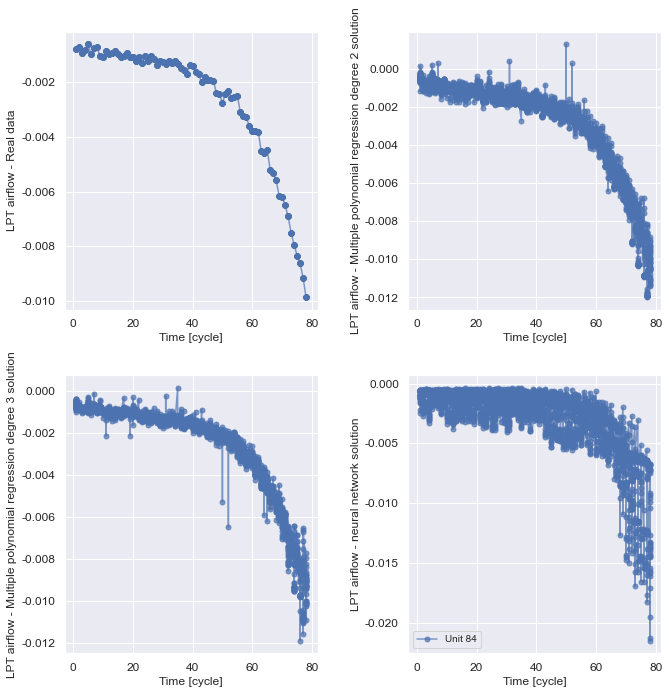

In [70]:
subset = Yhat_test.loc[(Yhat_test.unit == 84)]
labels = ['LPT airflow - Real data', 'LPT airflow - Multiple polynomial regression degree 2 solution', 
          'LPT airflow - Multiple polynomial regression degree 3 solution', 
          'LPT airflow - neural network solution']
plot_variables(subset, ['LPT_flow_mod_real', 'LPT_flow_mod_g2','LPT_flow_mod_g3','LPT_flow_mod_nn'], labels, 10, 12, 'cycle')

# 7 Conclusions

For the prognostics of the health status of a small fleet of turbofan engines, three different machine learning models has been used: multiple polynomial regression with degrees 2 and 3, and neural networks.

Multiple polynomial regression model provided very good results in average. Degree 3 polynomial regression provided even better results in terms of R-score accuracy and cleanliness of the time plot.

On the contrary, machine larning model provided results that could be considered as acceptable, but not so good in comparison with multiple polynomial regression models. Accuracy in terms of minimum-squared errors is worse in the case of the neural network model. Furthermore, the evolution of the time plot looks more noisy. The processing time is also higher, which is another drawback of this approach.

Dependencies between different components and parameters of a turbofan engine are strongly non-linear. Nevertheless, it is possible to monitor and predict the health status of the components with high accuracy by feeding a multiple polynomial regression model of degree 3 with onboard sensor measurements. Prior to that, it is necessary to dispose a good simulation of the turbofan under test (with tools such C-MAPSS) and create a large dataset with different combinations of degraded components and level of degradation.